In [11]:
# Importing relevant packages
import os
import shutil 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization


In [53]:
#Moving photos from Not Van Gogh/Van Gogh folder into test subfolder 

# dire = '\\Users\\biann\\Documents\\Phase-4-Project\\images\\Not Van Gogh'
# dest ='\\Users\\biann\\Documents\\Phase-4-Project\\images\\test\\Not Van Gogh'
# import os

# for i in os.listdir(dire)[:100]:
#     shutil.move(dire +'/' +i, dest )

# dire = '\\Users\\biann\\Documents\\Phase-4-Project\\images\\Van Gogh'
# dest ='\\Users\\biann\\Documents\\Phase-4-Project\\images\\test\\Van Gogh'
# import os

# for i in os.listdir(dire)[:100]:
#     shutil.move(dire +'/' +i, dest )

In [54]:
#Moving photos from Not Van Gogh/Van Gogh folder into train subfolder 

# dire = '\\Users\\biann\\Documents\\Phase-4-Project\\images\\Not Van Gogh'
# dest ='\\Users\\biann\\Documents\\Phase-4-Project\\images\\train\\Not Van Gogh'
# import os

# for i in os.listdir(dire)[100:]:
#     shutil.move(dire +'/' +i, dest )
    
# dire = '\\Users\\biann\\Documents\\Phase-4-Project\\images\\Van Gogh'
# dest ='\\Users\\biann\\Documents\\Phase-4-Project\\images\\train\\Van Gogh'
# import os

# for i in os.listdir(dire)[100:]:
#     shutil.move(dire +'/' +i, dest )

In [12]:
test_dir = "\\Users\\biann\\Documents\\Phase-4-Project\\images\\test\\"

#Rescaling photos and setting validation split
test_datagen = ImageDataGenerator(rescale=1./255)

#Creating generator for testing
X_test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128,128),
    batch_size = 32,
    color_mode = "rgb",
    class_mode = "binary"
)

Found 441 images belonging to 2 classes.


In [13]:
train_dir = "\\Users\\biann\\Documents\\Phase-4-Project\\images\\train\\"

#Rescaling photos and setting validation split
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

#Creating generators for training and validation
X_train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128,128),
    batch_size = 32,
    color_mode = "rgb",
    class_mode = "binary"
)

X_validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128,128),
    batch_size = 32,
    class_mode = "binary",
    subset = "validation"
)


Found 1274 images belonging to 2 classes.
Found 254 images belonging to 2 classes.


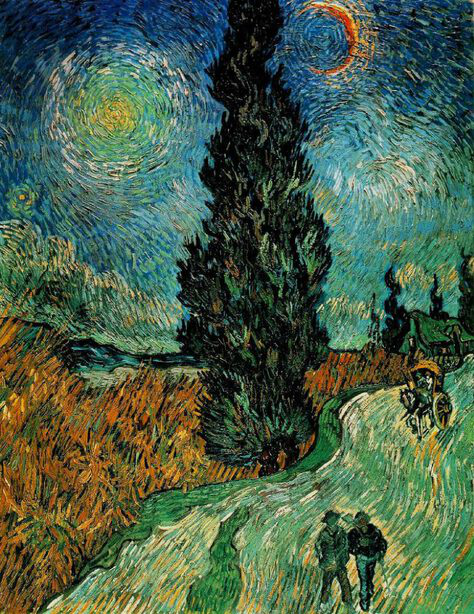

In [11]:
#Example of Van Gogh artwork
Image.open("C:\\Users\\biann\\Documents\\Phase-4-Project\\images\\train\\Van Gogh\\Vincent_van_Gogh_76.jpg")

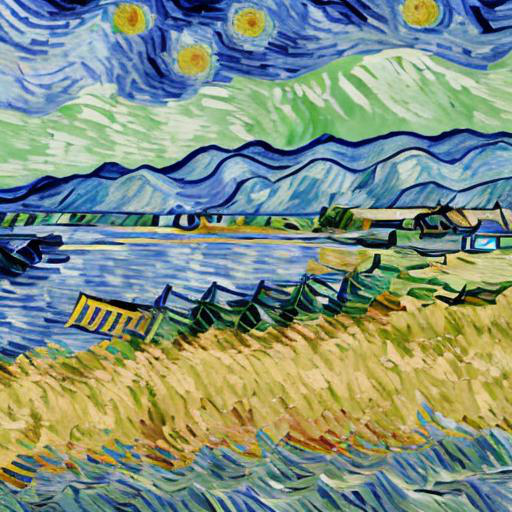

In [17]:
#Example of AI Generated Van Gogh artwork
Image.open("C:\\Users\\biann\\Documents\\Phase-4-Project\\images\\test\\Not Van Gogh\\AI-22.jpeg")

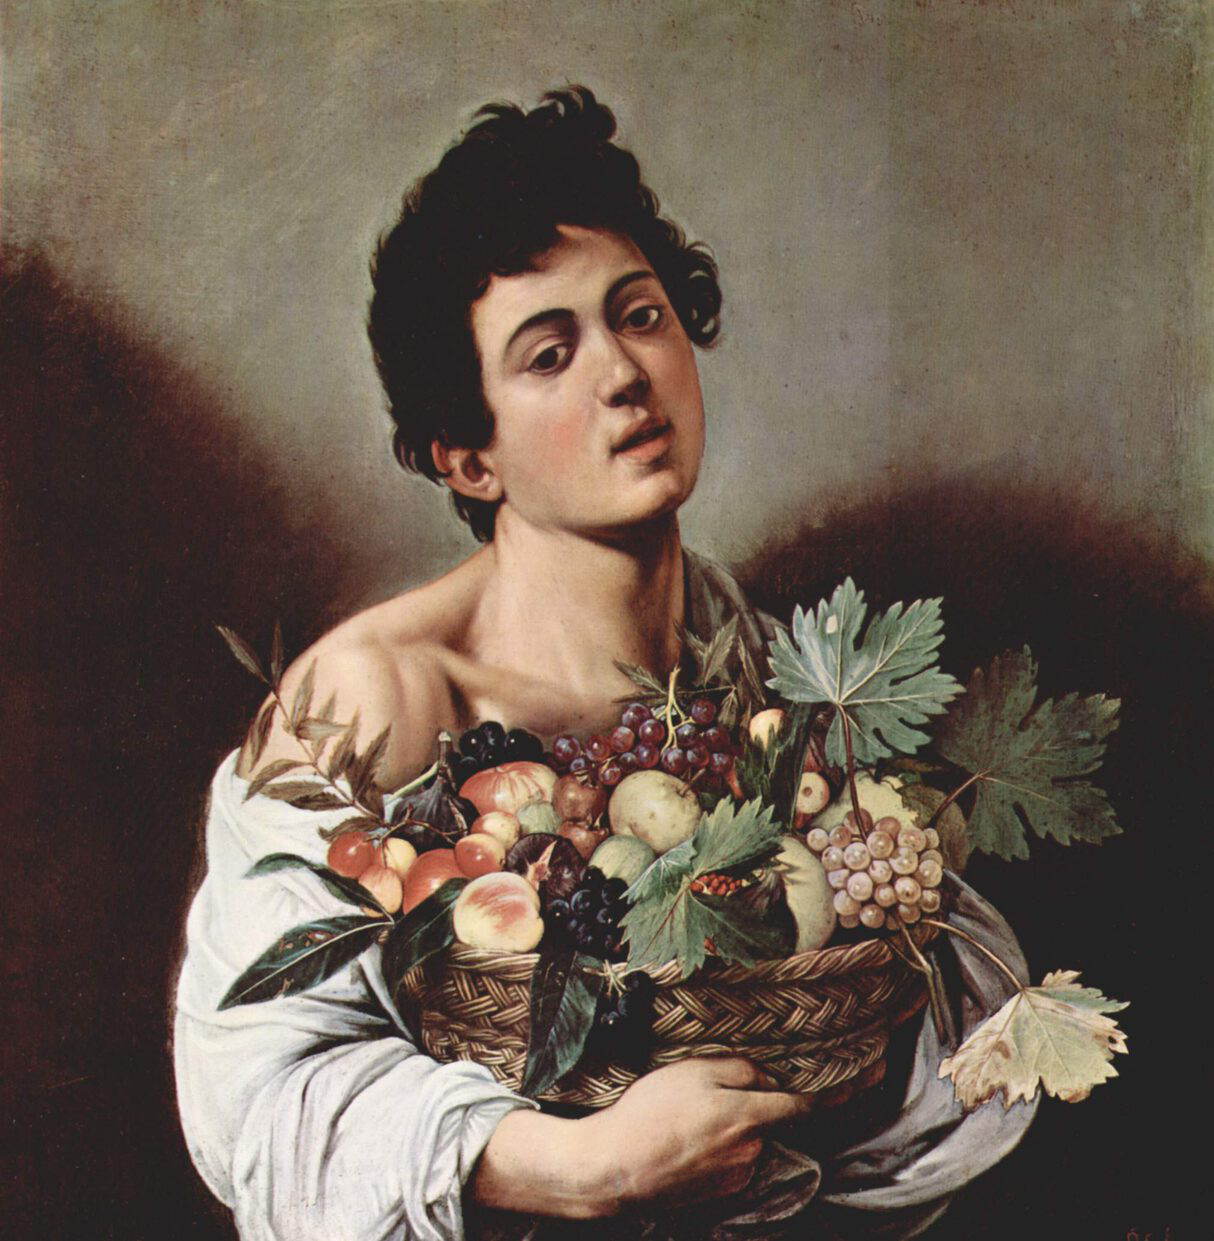

In [12]:
#Example of Caravaggio (Non-Van Gogh) artwork
Image.open("C:\\Users\\biann\\Documents\\Phase-4-Project\\images\\train\\Not Van Gogh\\Caravaggio_54.jpg")

In [9]:
#Importing CSV with artist details
artist_detail = pd.read_csv("artists.csv")
artist_detail = artist_detail[["name","genre","nationality","paintings"]]
artist_detail

name                                    genre  \
0           Amedeo Modigliani                            Expressionism   
1          Vasiliy Kandinskiy             Expressionism,Abstractionism   
2                Diego Rivera                  Social Realism,Muralism   
3                Claude Monet                            Impressionism   
4               Rene Magritte                 Surrealism,Impressionism   
5               Salvador Dali                               Surrealism   
6               Edouard Manet                    Realism,Impressionism   
7               Andrei Rublev                            Byzantine Art   
8            Vincent van Gogh                       Post-Impressionism   
9                Gustav Klimt                    Symbolism,Art Nouveau   
10           Hieronymus Bosch                     Northern Renaissance   
11           Kazimir Malevich                              Suprematism   
12             Mikhail Vrubel                                Symbolism   
13              Pablo Picasso                                   Cubism   
14          Peter Paul Rubens                                  Baroque   
15      Pierre-Auguste Renoir                            Impressionism   
16             Francisco Goya                              Romanticism   
17                Frida Kahlo                   Primitivism,Surrealism   
18                   El Greco                                Mannerism   
19             Albrecht Dürer                     Northern Renaissance   
20              Alfred Sisley                            Impressionism   
21             Pieter Bruegel                     Northern Renaissance   
22               Marc Chagall                              Primitivism   
23          Giotto di Bondone                        Proto Renaissance   
24          Sandro Botticelli                        Early Renaissance   
25                 Caravaggio                                  Baroque   
26          Leonardo da Vinci                         High Renaissance   
27            Diego Velazquez                                  Baroque   
28              Henri Matisse         Impressionism,Post-Impressionism   
29               Jan van Eyck                     Northern Renaissance   
30                Edgar Degas                            Impressionism   
31                  Rembrandt                                  Baroque   
32                     Titian               High Renaissance,Mannerism   
33  Henri de Toulouse-Lautrec                       Post-Impressionism   
34            Gustave Courbet                                  Realism   
35           Camille Pissarro         Impressionism,Post-Impressionism   
36             William Turner                              Romanticism   
37               Edvard Munch                  Symbolism,Expressionism   
38               Paul Cezanne                       Post-Impressionism   
39           Eugene Delacroix                              Romanticism   
40             Henri Rousseau                              Primitivism   
41             Georges Seurat                       Post-Impressionism   
42                  Paul Klee  Expressionism,Abstractionism,Surrealism   
43              Piet Mondrian                            Neoplasticism   
44                  Joan Miro                               Surrealism   
45                Andy Warhol                                  Pop Art   
46               Paul Gauguin             Symbolism,Post-Impressionism   
47                    Raphael                         High Renaissance   
48               Michelangelo                         High Renaissance   
49            Jackson Pollock                   Abstract Expressionism   

                 nationality  paintings  
0                    Italian        193  
1                    Russian         88  
2                    Mexican         70  
3                     French         73  
4                    Belgian        194 

In [10]:
# Exploring number of paintings by nationality
nationality_chart = artist_detail.groupby("nationality").sum().reset_index().sort_values("paintings",ascending=False)
nationality_chart

nationality  paintings
6                     French       2120
4                      Dutch       1360
15                   Spanish       1099
11                   Italian       1087
14                   Russian        484
5                    Flemish        356
9                     German        328
7             French,British        259
8   French,Jewish,Belarusian        239
0                   American        205
2                    Belgian        194
12                   Mexican        190
10              German,Swiss        188
1                   Austrian        117
16             Spanish,Greek         87
13                 Norwegian         67
3                    British         66

Text(0.5, 1.0, 'Number of Paintings by Nationality of Top 50 Artists')

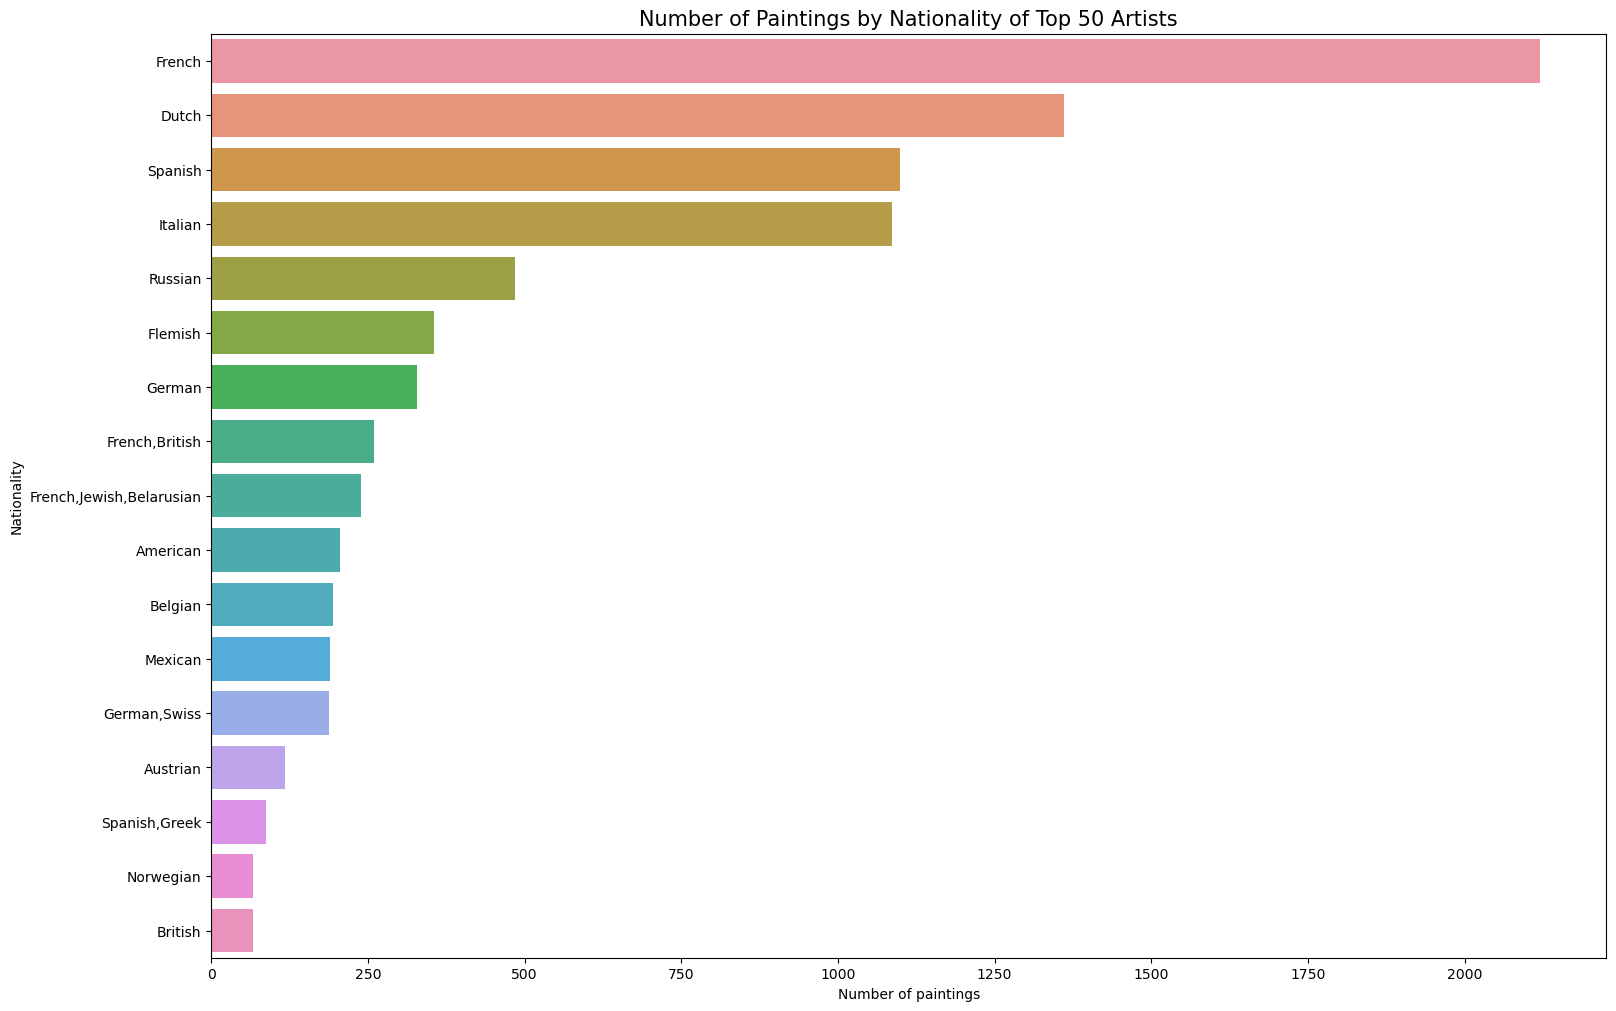

In [11]:
plt.figure(figsize=(18,12))
sns.barplot(orient="h",data=nationality_chart,x="paintings",y="nationality")
plt.xlabel("Number of paintings")
plt.ylabel("Nationality")
plt.title("Number of Paintings by Nationality of Top 50 Artists",fontsize=15)

In [12]:
# Exploring number of paintings by artist
artist_chart = artist_detail[["name","paintings"]].sort_values("paintings",ascending=False)
artist_chart

name  paintings
8            Vincent van Gogh        877
30                Edgar Degas        702
13              Pablo Picasso        439
15      Pierre-Auguste Renoir        336
19             Albrecht Dürer        328
46               Paul Gauguin        311
16             Francisco Goya        291
31                  Rembrandt        262
20              Alfred Sisley        259
32                     Titian        255
22               Marc Chagall        239
4               Rene Magritte        194
0           Amedeo Modigliani        193
42                  Paul Klee        188
28              Henri Matisse        186
45                Andy Warhol        181
12             Mikhail Vrubel        171
24          Sandro Botticelli        164
26          Leonardo da Vinci        143
14          Peter Paul Rubens        141
5               Salvador Dali        139
10           Hieronymus Bosch        137
21             Pieter Bruegel        134
27            Diego Velazquez        128
11           Kazimir Malevich        126
17                Frida Kahlo        120
23          Giotto di Bondone        119
9                Gustav Klimt        117
47                    Raphael        109
44                  Joan Miro        102
7               Andrei Rublev         99
35           Camille Pissarro         91
6               Edouard Manet         90
1          Vasiliy Kandinskiy         88
18                   El Greco         87
43              Piet Mondrian         84
33  Henri de Toulouse-Lautrec         81
29               Jan van Eyck         81
3                Claude Monet         73
2                Diego Rivera         70
40             Henri Rousseau         70
37               Edvard Munch         67
36             William Turner         66
34            Gustave Courbet         59
25                 Caravaggio         55
48               Michelangelo         49
38               Paul Cezanne         47
41             Georges Seurat         43
39           Eugene Delacroix         31
49            Jackson Pollock         24

Text(0.5, 1.0, 'Number of Paintings by Artist of Top 50 Artists')

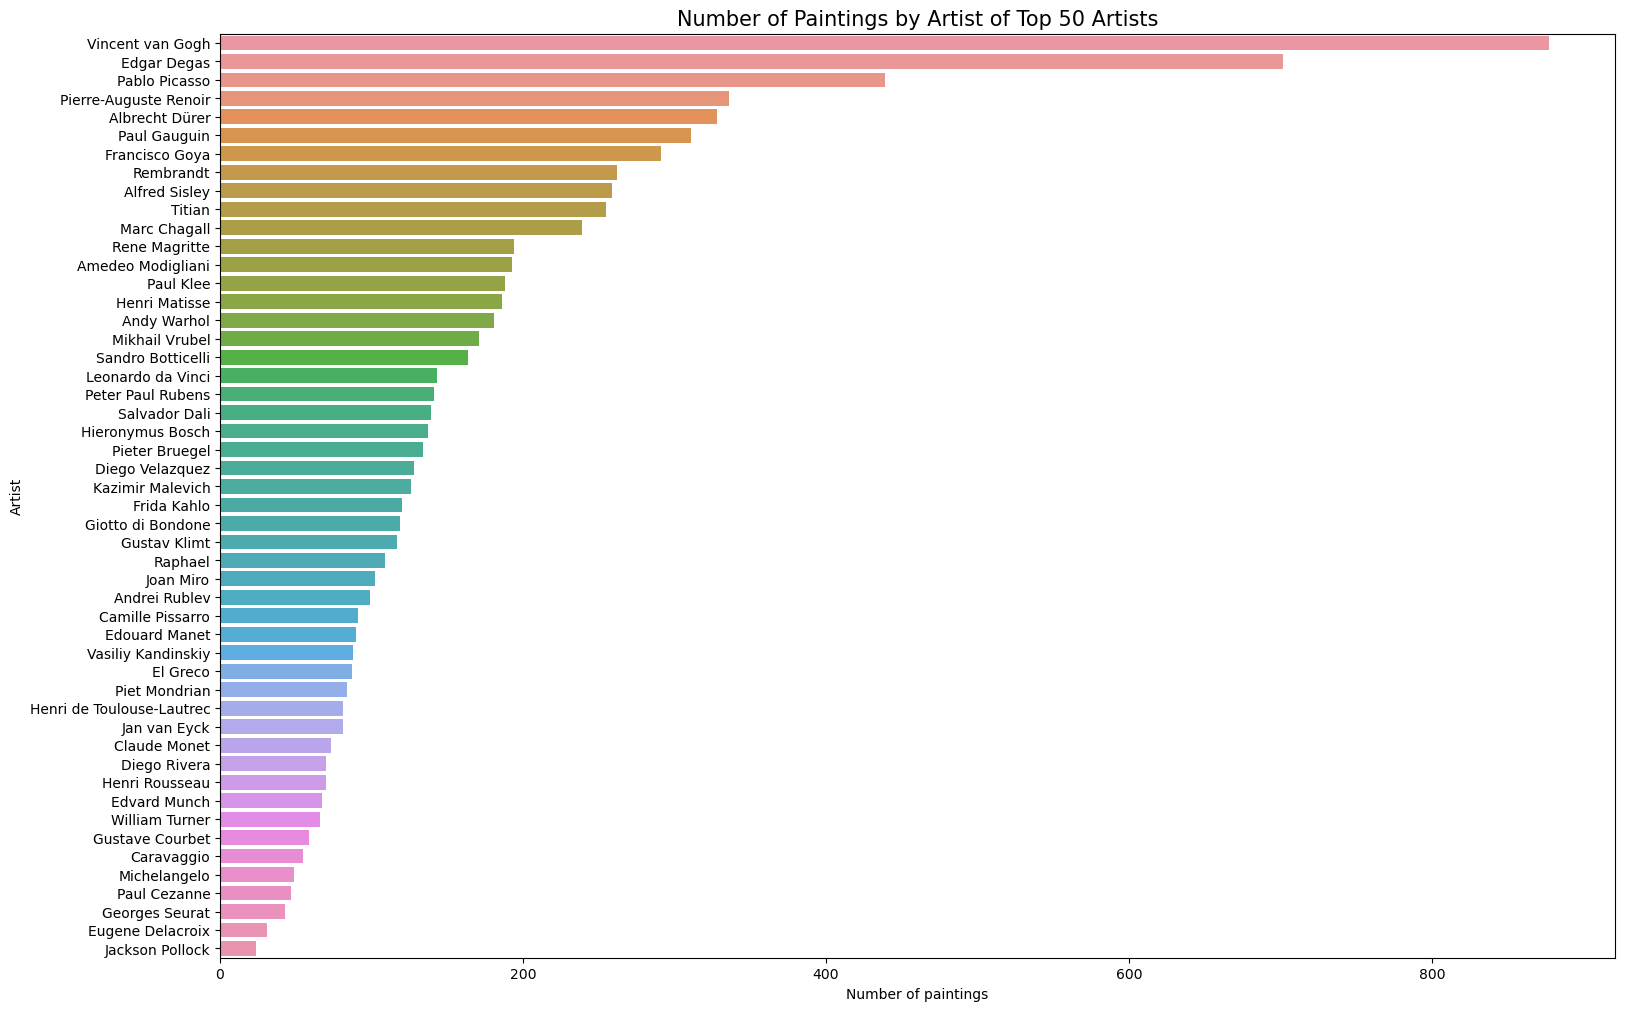

In [13]:
plt.figure(figsize=(18,12))
sns.barplot(orient="h",data=artist_chart,x="paintings",y="name")
plt.xlabel("Number of paintings")
plt.ylabel("Artist")
plt.title("Number of Paintings by Artist of Top 50 Artists",fontsize=15)

In [15]:
# Exploring number of paintings by genre
genre_chart = artist_detail.groupby("genre").sum().sort_values("paintings",ascending=False).reset_index()
genre_chart

genre  paintings
0                             Impressionism       1370
1                        Post-Impressionism       1048
2                      Northern Renaissance        680
3                                   Baroque        586
4                                    Cubism        439
5                               Romanticism        388
6              Symbolism,Post-Impressionism        311
7                               Primitivism        309
8                          High Renaissance        301
9          Impressionism,Post-Impressionism        277
10               High Renaissance,Mannerism        255
11                               Surrealism        241
12                 Surrealism,Impressionism        194
13                            Expressionism        193
14  Expressionism,Abstractionism,Surrealism        188
15                                  Pop Art        181
16                                Symbolism        171
17                        Early Renaissance        164
18                              Suprematism        126
19                   Primitivism,Surrealism        120
20                        Proto Renaissance        119
21                    Symbolism,Art Nouveau        117
22                            Byzantine Art         99
23                    Realism,Impressionism         90
24             Expressionism,Abstractionism         88
25                                Mannerism         87
26                            Neoplasticism         84
27                  Social Realism,Muralism         70
28                  Symbolism,Expressionism         67
29                                  Realism         59
30                   Abstract Expressionism         24

Text(0.5, 1.0, 'Number of Paintings by Genre of Top 50 Artists')

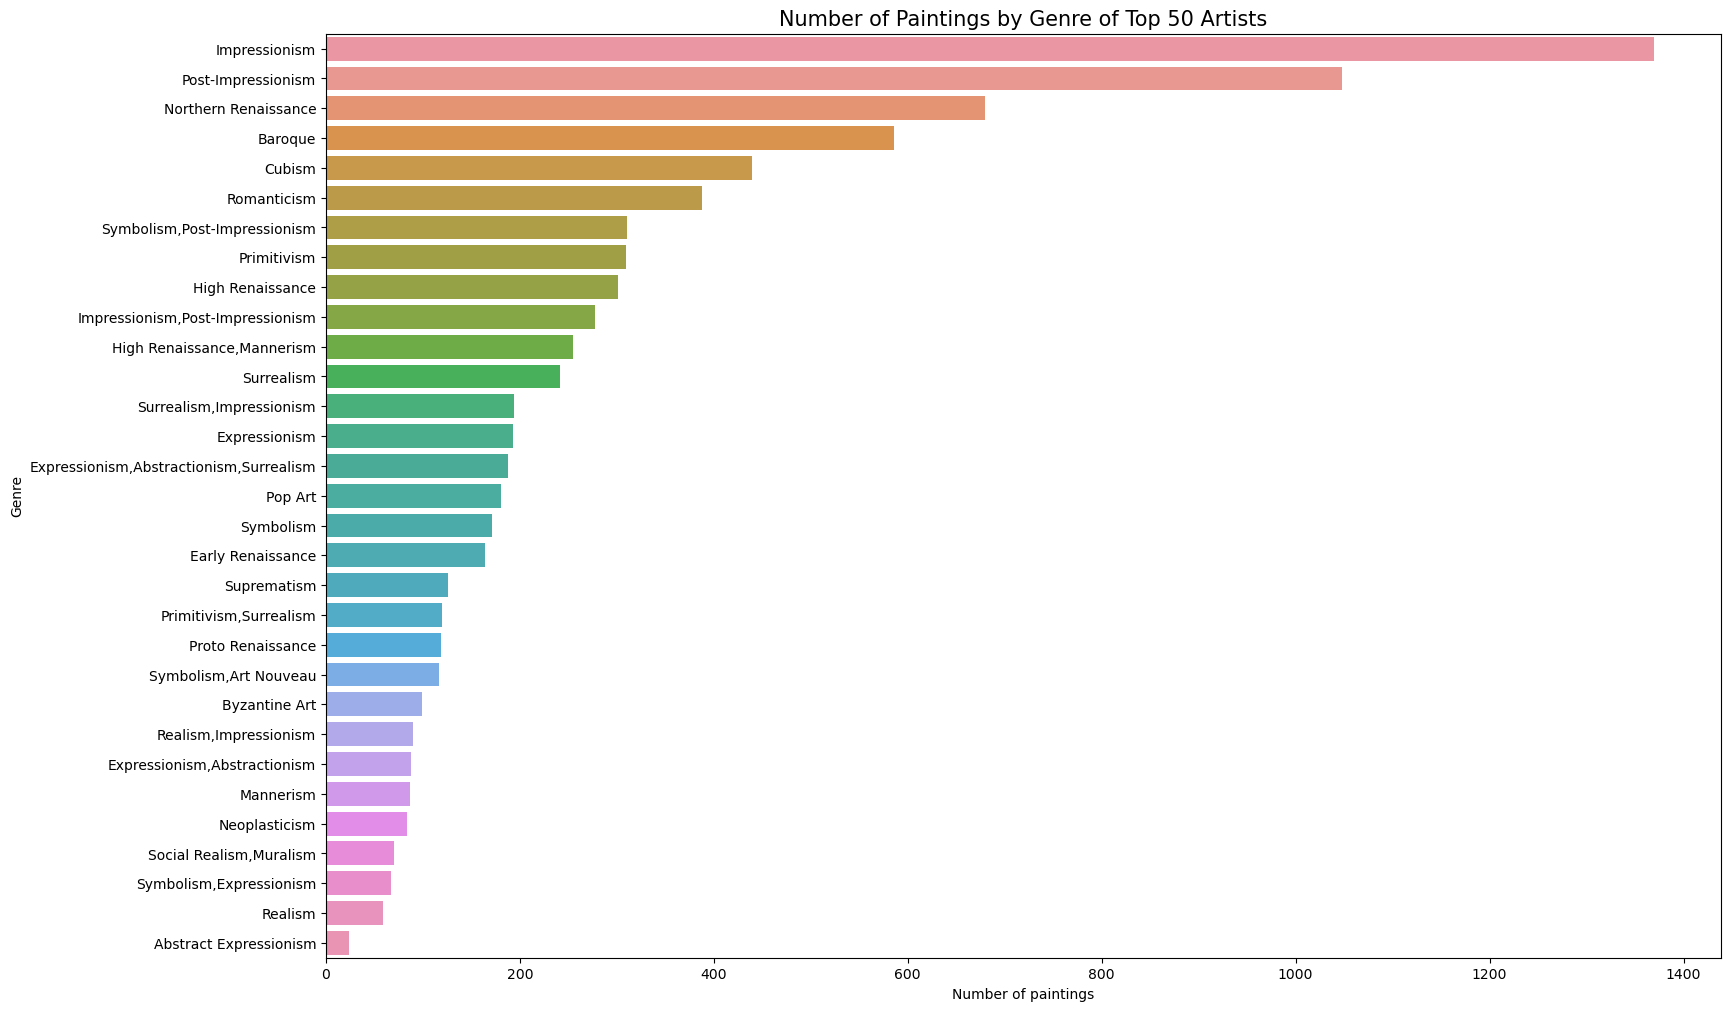

In [16]:
plt.figure(figsize=(18,12))
sns.barplot(orient="h",data=genre_chart,x="paintings",y="genre")
plt.xlabel("Number of paintings")
plt.ylabel("Genre")
plt.title("Number of Paintings by Genre of Top 50 Artists",fontsize=15)

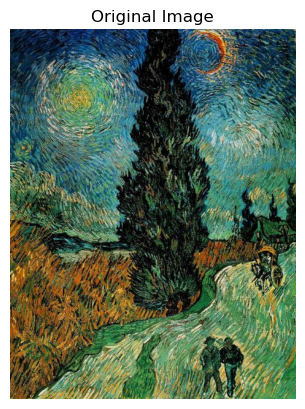

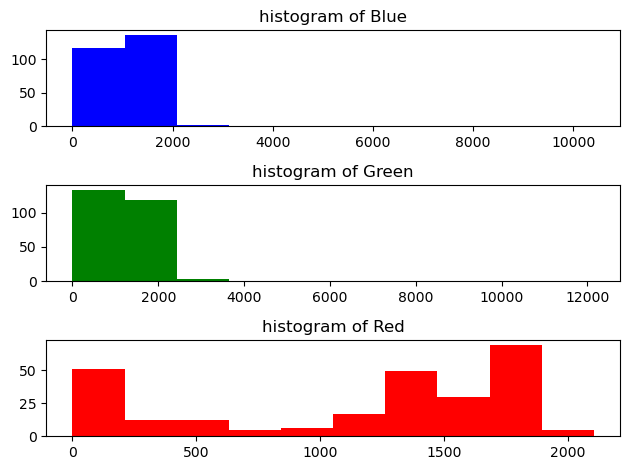

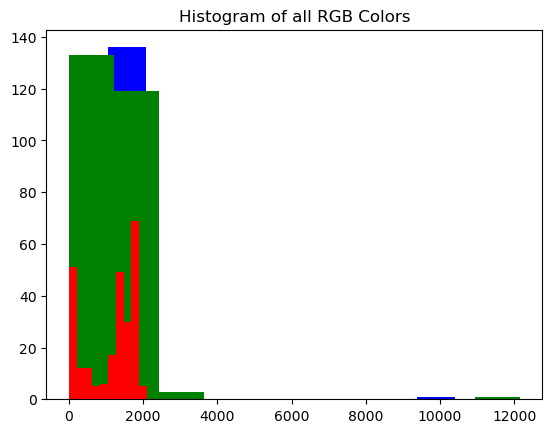

In [1]:
#Exploring RGB Distributions for images

import cv2
import matplotlib.pyplot as plt
  
# load image
imageObj = cv2.imread("C:\\Users\\biann\\Documents\\Phase-4-Project\\images\\train\\Van Gogh\\Vincent_van_Gogh_76.jpg")
# to avoid grid lines
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()
  
# Get RGB data from image
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])
  
# Separate Histograms for each color
plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")
  
plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")
  
plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")
  
# for clear view
plt.tight_layout()
plt.show()
  
# combined histogram
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()

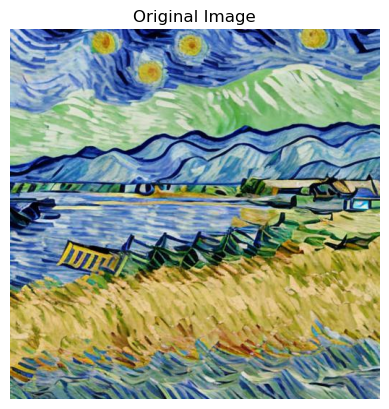

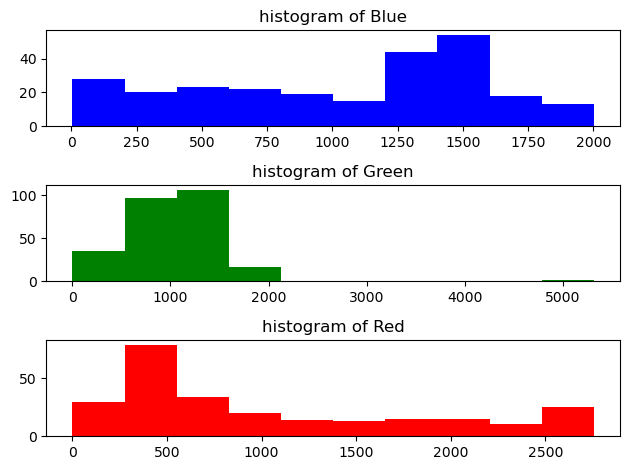

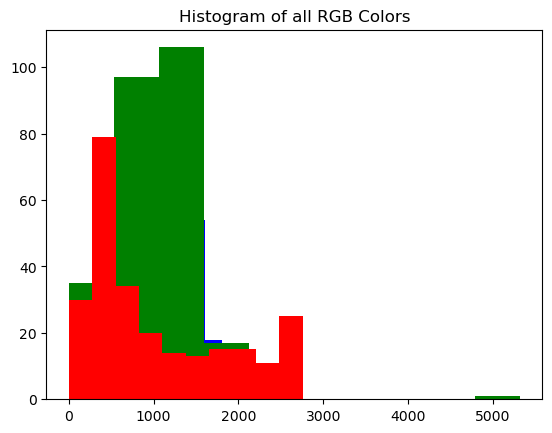

In [2]:
# load image
imageObj = cv2.imread("C:\\Users\\biann\\Documents\\Phase-4-Project\\images\\test\\Not Van Gogh\\AI-22.jpeg")
# to avoid grid lines
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()
  
# Get RGB data from image
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])
  
# Separate Histograms for each color
plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")
  
plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")
  
plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")
  
# for clear view
plt.tight_layout()
plt.show()
  
# combined histogram
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()

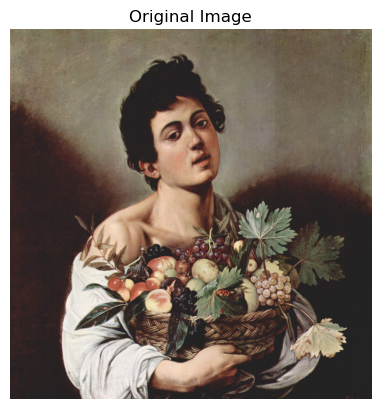

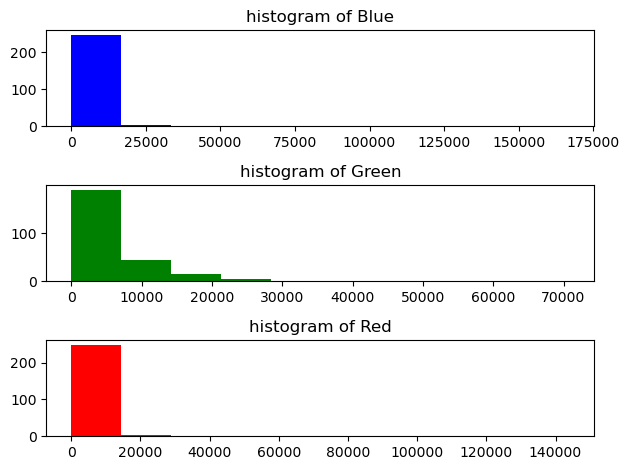

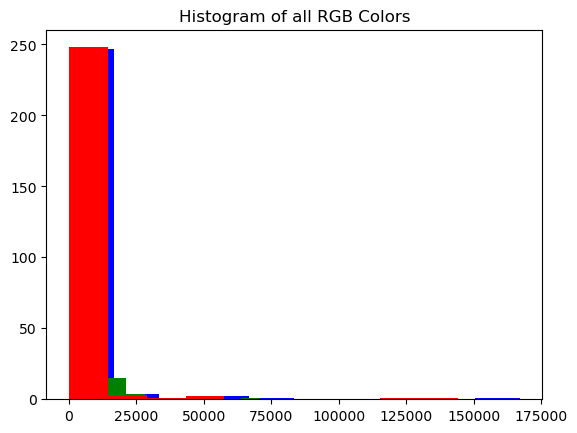

In [3]:
# load image
imageObj = cv2.imread("C:\\Users\\biann\\Documents\\Phase-4-Project\\images\\train\\Not Van Gogh\\Caravaggio_54.jpg")
# to avoid grid lines
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()
  
# Get RGB data from image
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])
  
# Separate Histograms for each color
plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")
  
plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")
  
plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")
  
# for clear view
plt.tight_layout()
plt.show()
  
# combined histogram
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , Activation
from tensorflow.keras.regularizers import l2

In [15]:
model = Sequential()
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))

scce = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(loss=scce,
              optimizer="adam",
              metrics=['accuracy'])

model.fit_generator(
    X_train_generator,
    steps_per_epoch= 6,
    epochs=10,
    validation_data=X_validation_generator,
    validation_steps=254//32)

Epoch 1/10
6/6 [==============================] - 7s 1s/step - loss: 0.8499 - accuracy: 0.5312 - val_loss: 0.7071 - val_accuracy: 0.4777
Epoch 2/10
6/6 [==============================] - 4s 623ms/step - loss: 0.6986 - accuracy: 0.4948 - val_loss: 0.6912 - val_accuracy: 0.5357
Epoch 3/10
6/6 [==============================] - 3s 562ms/step - loss: 0.6914 - accuracy: 0.5365 - val_loss: 0.6962 - val_accuracy: 0.4688
Epoch 4/10
6/6 [==============================] - 3s 572ms/step - loss: 0.6884 - accuracy: 0.5000 - val_loss: 0.6856 - val_accuracy: 0.5625
Epoch 5/10
6/6 [==============================] - 3s 476ms/step - loss: 0.6665 - accuracy: 0.5753 - val_loss: 0.7339 - val_accuracy: 0.5089
Epoch 6/10
6/6 [==============================] - 3s 538ms/step - loss: 0.6970 - accuracy: 0.5052 - val_loss: 0.6935 - val_accuracy: 0.5491
Epoch 7/10
6/6 [==============================] - 3s 452ms/step - loss: 0.6612 - accuracy: 0.5677 - val_loss: 0.6905 - val_accuracy: 0.5402
Epoch 8/10
6/6 [=======

In [18]:
model.save("models/base_model")

INFO:tensorflow:Assets written to: models/base_model\assets


INFO:tensorflow:Assets written to: models/base_model\assets


In [19]:
y_preds = model.predict(X_test_generator)

14/14 [==============================] - 2s 159ms/step


In [20]:
y_pred_classes = np.argmax(y_preds, axis=1)

y_true = X_test_generator.classes
y_true

cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[ 13 228]
 [  5 195]]


In [30]:
model2 = Sequential()
model2.add(Conv2D(32, (2, 2)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
 
model2.add(Conv2D(64, (2, 2)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
 
model2.add(Flatten())

model2.add(Dense(256, activation='relu'))

model2.add(Dense(128, activation='relu'))

model2.add(Dense(64, activation='relu'))

model2.add(Dense(2, activation='softmax'))

scce = tf.keras.losses.SparseCategoricalCrossentropy()

model2.compile(loss=scce,
              optimizer="adam",
              metrics=['accuracy'])

model2.fit_generator(
    X_train_generator,
    steps_per_epoch= 6,
    epochs=15,
    validation_data=X_validation_generator,
    validation_steps=254//32)

Epoch 1/15
6/6 [==============================] - 3s 432ms/step - loss: 1.8798 - accuracy: 0.4792 - val_loss: 1.1051 - val_accuracy: 0.4554
Epoch 2/15
6/6 [==============================] - 2s 400ms/step - loss: 0.7756 - accuracy: 0.5365 - val_loss: 0.7638 - val_accuracy: 0.5312
Epoch 3/15
6/6 [==============================] - 2s 420ms/step - loss: 0.7264 - accuracy: 0.4479 - val_loss: 0.6876 - val_accuracy: 0.5089
Epoch 4/15
6/6 [==============================] - 2s 430ms/step - loss: 0.6550 - accuracy: 0.6615 - val_loss: 0.7806 - val_accuracy: 0.5402
Epoch 5/15
6/6 [==============================] - 2s 399ms/step - loss: 0.7077 - accuracy: 0.5625 - val_loss: 0.6836 - val_accuracy: 0.5357
Epoch 6/15
6/6 [==============================] - 2s 407ms/step - loss: 0.6809 - accuracy: 0.5938 - val_loss: 0.6777 - val_accuracy: 0.5491
Epoch 7/15
6/6 [==============================] - 2s 381ms/step - loss: 0.6669 - accuracy: 0.5833 - val_loss: 0.6772 - val_accuracy: 0.5491
Epoch 8/15
6/6 [====

In [31]:
y_preds = model2.predict(X_test_generator)

14/14 [==============================] - 2s 137ms/step


In [32]:
y_pred_classes = np.argmax(y_preds, axis=1)

y_true = X_test_generator.classes
y_true

cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[ 95 146]
 [ 80 120]]


In [68]:
model2.save("models/model_2")

INFO:tensorflow:Assets written to: models/model_2\assets


INFO:tensorflow:Assets written to: models/model_2\assets


In [34]:
model3 = Sequential()
model3.add(Conv2D(32, (2, 2)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
 
model3.add(Conv2D(64, (2, 2)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
 
model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(128, activation='relu'))

model3.add(Dense(64, activation='relu'))

model3.add(Dense(2, activation='softmax'))

scce = tf.keras.losses.SparseCategoricalCrossentropy()

model3.compile(loss=scce,
              optimizer="adam",
              metrics=['accuracy'])

model3.fit_generator(
    X_train_generator,
    steps_per_epoch= 6,
    epochs=10,
    validation_data=X_validation_generator,
    validation_steps=254//32)

Epoch 1/10
6/6 [==============================] - 3s 501ms/step - loss: 1.3916 - accuracy: 0.4531 - val_loss: 0.7442 - val_accuracy: 0.4464
Epoch 2/10
6/6 [==============================] - 2s 432ms/step - loss: 0.7318 - accuracy: 0.5833 - val_loss: 0.6945 - val_accuracy: 0.5402
Epoch 3/10
6/6 [==============================] - 3s 473ms/step - loss: 0.7040 - accuracy: 0.5260 - val_loss: 0.6924 - val_accuracy: 0.4777
Epoch 4/10
6/6 [==============================] - 2s 447ms/step - loss: 0.6968 - accuracy: 0.5052 - val_loss: 0.6754 - val_accuracy: 0.5491
Epoch 5/10
6/6 [==============================] - 2s 422ms/step - loss: 0.6818 - accuracy: 0.5729 - val_loss: 0.6628 - val_accuracy: 0.6473
Epoch 6/10
6/6 [==============================] - 2s 448ms/step - loss: 0.6469 - accuracy: 0.6302 - val_loss: 0.6567 - val_accuracy: 0.5848
Epoch 7/10
6/6 [==============================] - 2s 410ms/step - loss: 0.7055 - accuracy: 0.5312 - val_loss: 0.6473 - val_accuracy: 0.6250
Epoch 8/10
6/6 [====

In [67]:
model3.save("models/model_3")

INFO:tensorflow:Assets written to: models/model_3\assets


INFO:tensorflow:Assets written to: models/model_3\assets


In [35]:
y_preds = model3.predict(X_test_generator)

14/14 [==============================] - 2s 168ms/step


In [36]:
y_pred_classes = np.argmax(y_preds, axis=1)

y_true = X_test_generator.classes
y_true

cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[ 73 168]
 [ 64 136]]


14/14 [==============================] - 2s 146ms/step


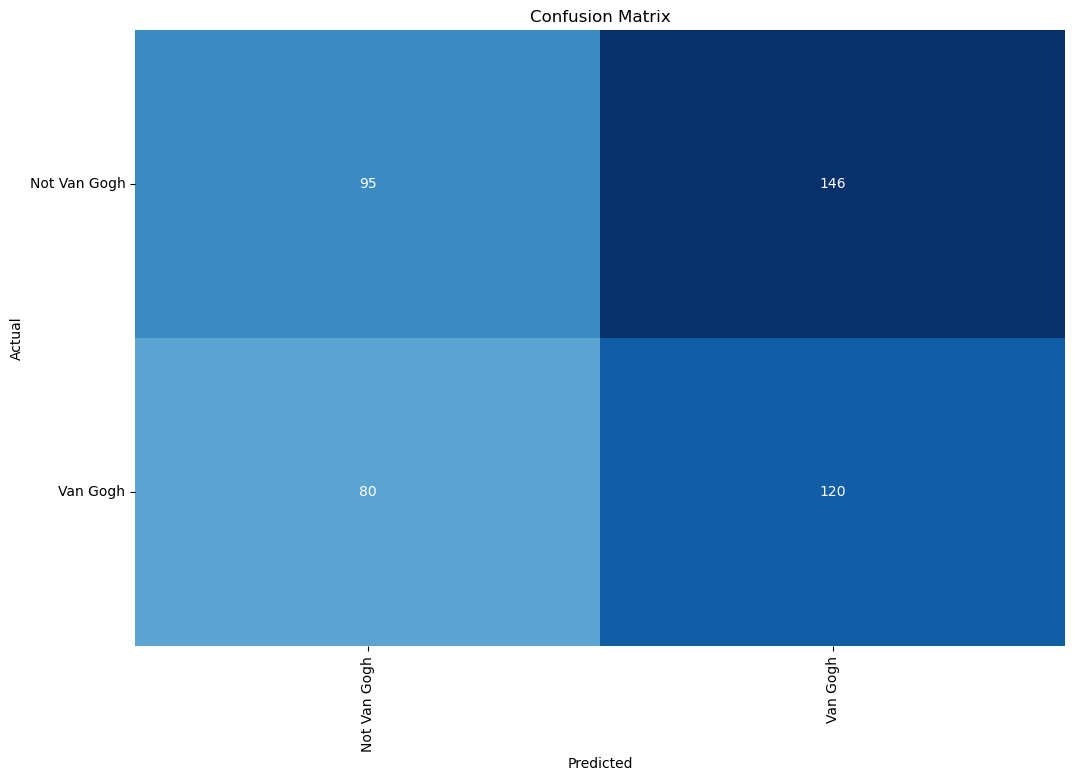

Classification Report:
----------------------
               precision    recall  f1-score   support

Not Van Gogh     0.5429    0.3942    0.4567       241
    Van Gogh     0.4511    0.6000    0.5150       200

    accuracy                         0.4875       441
   macro avg     0.4970    0.4971    0.4859       441
weighted avg     0.5013    0.4875    0.4832       441



In [74]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def predictor(test_gen):    
    y_pred= []
    error_list=[]
    error_pred_list = []
    y_true=X_test_generator.labels
    classes=list(X_test_generator.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model2.predict(test_gen, verbose=1)
    tests=len(preds)    
    for i, p in enumerate(preds):        
        pred_index=np.argmax(p)         
        true_index=X_test_generator.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors=errors + 1
            file=test_gen.filenames[i]
            error_list.append(file)
            error_class=classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc=( 1-errors/tests) * 100
    msg=f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}'
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests, error_list, error_pred_list, f1score

errors, tests, error_list, error_pred_list, f1score =predictor(X_test_generator)